In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
print('OK')

OK


In [2]:
newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )
print('OK')

OK


In [3]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
#z = vectorizer.fit_transform(np.array(newsgroups.data))
#samples = z.toarray() # value Tf-idf-weighted document-term matrix
y = newsgroups.target
#x = vectorizer.idf_ # The inverse document frequency (IDF) vector; only defined if use_idf is True
#print(x[0])
#print(z.toarray())
#clf.fit(newsgroups.data,newsgroups.target)
print('OK')

OK


In [4]:
grid = {'C': np.power(10.0, np.arange(-5, 6))}
cv = KFold(n_splits=5, shuffle=True, random_state=241)
clf = SVC(kernel='linear', random_state=241)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv, return_train_score=True)
#gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(X,y)
print('OK')

OK


In [5]:
# To define optimal parameter 'C'
#print(gs.refit_time_)
cv_results = pd.DataFrame(gs.cv_results_) # http://qaru.site/questions/16902941/what-is-the-alternative-function-for-meanvalidationscore-in-gridcvresults
c_o1 = np.max(cv_results.mean_test_score) # max value score
print(c_o1)
dd = list(cv_results.mean_test_score).index(c_o1) # first index with optimal value 'C' (max score)
C_opt = grid.get('C')[dd] # optimal value 'C' (max score)
print(C_opt)
#list(cv_results.columns.values) # columns names
#cv_results
#print('OK')

0.9932810750279956
1.0


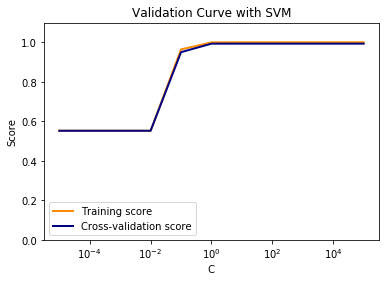

OK


In [6]:
# Plotting Validation Curves
plt.title("Validation Curve with SVM")
plt.xlabel(" C ")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(cv_results.param_C, cv_results.mean_train_score, label="Training score",
             color="darkorange", lw=lw)
plt.semilogx(cv_results.param_C, cv_results.mean_test_score, label="Cross-validation score",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#plt.plot(cv_results.param_C, cv_results.mean_test_score)
#print(cv_results.param_C)
#print(cv_results.mean_test_score)
print('OK')

In [7]:
# train all dataset
C_opt = 1.0
clf2 = SVC(C=C_opt, gamma='auto', random_state=241, kernel='linear')
clf2.fit(X,y)
print('OK')

OK


In [8]:
# finish
coef=clf2.coef_
q=pd.DataFrame(coef.toarray()).transpose()
top10=abs(q).sort_values([0], ascending=False).head(10)
indices=[]

indices=top10.index
print(indices)
words=[]

for i in indices:
    feature_mapping=vectorizer.get_feature_names()
    words.append(feature_mapping[i])

res = sorted(words)
print(res)

f= open("answers_7/1.txt","w+")
#f.write(str(words))
f.write((" ".join(res))) # этот метод не даёт лишних пробелов
f.close()

Int64Index([24019, 12871, 5088, 5093, 17802, 23673, 21850, 5776, 15606, 22936], dtype='int64')
['atheism', 'atheists', 'bible', 'god', 'keith', 'moon', 'religion', 'sci', 'sky', 'space']


In [9]:
# finish my - not correct!!!
ten = np.argsort(clf2.coef_)[0,-10:] # indeces last ten value (max)
print(ten)

wordsss=[]

for i in ten:
    feature_mapping = vectorizer.get_feature_names() # Array mapping from feature integer indices to feature name
    wordsss.append(feature_mapping[i])

res = sorted(wordsss)
print(res)

f= open("answers_7/1.txt","w+")
#f.write(str(words))
f.write((" " . join(res))) # этот метод не даёт лишних пробелов
f.close()

IndexError: too many indices for array